## 네이버 지식IN 을 통한 검색을 워드클라우드

- 물론 네이버 개발자 API를 이용하면 훨씬 빠르게 데이타를 가져올 수 있다

- 간단하게 주소창의 주소로 크롤링한다.

- 크롬 개발자모드에서 검색부분을 가져온다 ( 각 dl 태그 )


In [1]:
import pandas as pd
import numpy as np

import platform
import matplotlib.pyplot as plt

from bs4 import BeautifulSoup 
from urllib.request import urlopen
import urllib
import time

%matplotlib inline

# 간단한 한글 폰드 등록
from matplotlib import rc
plt.rcParams['axes.unicode_minus']=False
rc('font', family='Malgun Gothic')


In [2]:
# 주소를 약간 수정함
tmp1 = 'https://search.naver.com/search.naver?where=kin'
html = tmp1 + '&sm=tab_jum&ie=utf8&query={key_word}&kin_start={num}'

response = urlopen(html.format(num=1, key_word=urllib.parse.quote('여자친구 선물')))

soup = BeautifulSoup(response, "html.parser")

tmp = soup.find_all('dl')

In [3]:
# 테스트로 첫번째 페이지의 텍스트만 가져온다
tmp_list = []
for line in tmp:
    tmp_list.append(line.text)
    
tmp_list[:5]

[' 기본검색   입력한 단어가 하나이상 포함된 문서 검색  ',
 ' 상세검색  정확히 일치하는 단어/문장(" ") 반드시 포함하는 단어(+) 제외하는 단어(-)  기본검색의 결과 범위를 줄이고자 할 때 사용합니다.여러개의 단어를 입력하실 때는쉼표(,)로 구분해서 입력하세요.   ',
 '  질문  여자친구 선물 추천 부탁드립니다.(목걸이)   2020.06.06.   안녕하세요 여자친구 선물로 목걸이를 선물하고 싶어서 이렇게 글을 올립니다. 제가 쥬얼리 쪽은 브랜드가 어떻게 되어 있는지 잘 몰라서요. 20대 중반 저랑 동갑인...   답변 14K 18k 1부 2부 3부 다이아 큐빅 프러포즈 데일리 목걸이 : 샤밍 주얼리 [샤밍주얼리] 14K 18k 1부 & 2부 3부 다이아 or 큐빅 프러포즈 데일리 목걸이 (우신, 현대...    닉네임샤밍제이   ',
 '  질문  여자친구 선물 추천좀요!   17시간 전   안녕하세요 곧 여자친구와 100일이되는 한 고딩입니다 여자친구에게 이벤트와 선물을주고싶어요 근데 여자친구 선물을 검색했더니 화장품이 많은데 "★제 여자친구는...   답변 안녕하세요 ~~ 공연기획사 파릇 입니다:) 여자친구 100일 선물이 고민이시군요 !! 여자친구 100일 선물 몇가지 추천드려볼께요~ 일단, 직접 정성드려 만든 선물보다 더...    닉네임공연기획사 파릇   ',
 '  질문  여자친구 선물 추천 부탁드려요~   2020.01.20.   저기요...여자친구 선물 추천 좀 해 주세요~ 너무 부담스럽지 않은 가벼운 종류로 찾고... 없이 좋아하면서도 실용적인 그런 종류로 괜찮은 여자친구 선물 추천 부탁드립니다~   답변 저는 여자친구 선물 추천으로 천연 성분으로 된 스킨... 같아서 여자친구 선물 추천으로 딱인 것 같아요~~ 저도... 역시 여자친구 선물 추천이라고 하면 꽃!! 하지만 진짜...    닉네임hm8h****   ']

In [4]:
#1000 만개 정도의 검색 결과를 읽어온다.
# 첫번째 페이지 start=1, 두번째 페이지인 경우 start=11인거 확인한다.
# 웹 페이지 직접 접근 할 땐느 간단이 time.sleep()으로 요청을 간격적으로 한다.
# 시간이 10분 정도 소요되기에 상태바를 보여준다. ( tqdm.tqdm_notebook 이용)

from urllib.request import urlopen
from tqdm import tqdm_notebook #progress bar 만들어줌

present_candi_text = []

for n in tqdm_notebook(range(1,1000,10)): # 1부터 999까지 10단위로 jumping
    response = urlopen(html.format(num=n, key_word=urllib.parse.quote('여자친구 선물')))
    soup = BeautifulSoup(response, "html.parser")
    tmp = soup.find_all('dl')
    
    for line in tmp:
        present_candi_text.append(line.text)
    time.sleep(5)

C:\Users\Canon\anaconda3\lib\site-packages\ipykernel_launcher.py:11: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  # This is added back by InteractiveShellApp.init_path()


In [5]:
len(present_candi_text)

1300

In [6]:
# 만개의 글을 하나의 변수에 저장하기
import nltk
from konlpy.tag import Okt

okt = Okt()

present_text = ''
for each_line in present_candi_text[:10000]:
    present_text = present_text + each_line + '\n'

In [7]:
# 형태소 분석
tokens_ko = okt.morphs(present_text)
tokens_ko

['기본',
 '검색',
 '입력',
 '한',
 '단어',
 '가',
 '하나',
 '이상',
 '포함',
 '된',
 '문서',
 '검색',
 '상세',
 '검색',
 '정확히',
 '일치',
 '하는',
 '단어',
 '/',
 '문장',
 '("',
 '")',
 '반드시',
 '포함',
 '하는',
 '단어',
 '(+)',
 '제외',
 '하는',
 '단어',
 '(-)',
 '기',
 '본',
 '검색',
 '의',
 '결과',
 '범위',
 '를',
 '줄이고자',
 '할',
 '때',
 '사용',
 '합니다',
 '.',
 '여러',
 '개',
 '의',
 '단어',
 '를',
 '입력',
 '하실',
 '때',
 '는',
 '쉼표',
 '(,)',
 '로',
 '구분',
 '해서',
 '입력',
 '하세요',
 '.',
 '질문',
 '여자친구',
 '선물',
 '추천',
 '부탁드립니다',
 '.(',
 '목걸이',
 ')',
 '2020.06',
 '.',
 '06',
 '.',
 '안녕하세요',
 '여자친구',
 '선물',
 '로',
 '목걸이',
 '를',
 '선물',
 '하고',
 '싶어서',
 '이렇게',
 '글',
 '을',
 '올립니다',
 '.',
 '제',
 '가',
 '쥬얼리',
 '쪽',
 '은',
 '브랜드',
 '가',
 '어떻게',
 '되어',
 '있는지',
 '잘',
 '몰라서요',
 '.',
 '20',
 '대',
 '중반',
 '저',
 '랑',
 '동갑',
 '인',
 '...',
 '답변',
 '14',
 'K',
 '18',
 'k',
 '1',
 '부',
 '2',
 '부',
 '3',
 '부',
 '다이아',
 '큐빅',
 '프러포즈',
 '데',
 '일리',
 '목걸이',
 ':',
 '샤밍',
 '주얼리',
 '[',
 '샤밍',
 '주얼리',
 ']',
 '14',
 'K',
 '18',
 'k',
 '1',
 '부',
 '&',
 '2',
 '부',
 '3',
 '부',
 '다이아',
 'or'

In [8]:
ko = nltk.Text(tokens_ko, name='여자 친구 선물') # 한글을 쓸때는 name=''을 줌
print(len(ko.tokens))
print(len(set(ko.tokens))) # 중복제거(duplicated는 df만 가능)

83855
7244


In [9]:
# 그 중에서 많이 사용되는 단어 100개
ko.vocab().most_common(100)

[('선물', 4384),
 ('여자친구', 3632),
 ('.', 3394),
 ('...', 1641),
 ('로', 1157),
 ('이', 1118),
 ('추천', 1084),
 ('질문', 1077),
 ('답변', 1069),
 ('가', 1038),
 ('을', 982),
 ('닉네임', 908),
 ('대', 756),
 ('를', 737),
 ('에', 730),
 ('?', 642),
 ('는', 564),
 ('요', 525),
 ('목걸이', 510),
 ('20', 509),
 ('도', 504),
 ('단어', 500),
 ('여자', 498),
 ('****', 463),
 (',', 452),
 ('검색', 442),
 ('은', 432),
 ('좀', 410),
 ('..', 410),
 ('하는', 393),
 ('때', 386),
 ('제', 373),
 ('의', 354),
 ('한', 340),
 ('생일', 330),
 ('입력', 300),
 ('뭐', 295),
 ('화장품', 281),
 ('저', 277),
 ('으로', 276),
 ('!', 268),
 ('합니다', 266),
 ('입니다', 254),
 ('30', 252),
 ('안녕하세요', 241),
 ('해주세요', 231),
 ('들', 227),
 ('것', 226),
 ('중', 226),
 ('~', 217),
 ('하나', 216),
 ('인데', 215),
 ('1', 210),
 ('포함', 208),
 ('거', 208),
 ('생각', 202),
 ('고민', 201),
 ('하는데', 200),
 ('연관검색어', 200),
 ('좋을까요', 197),
 ('해서', 190),
 ('어떤', 184),
 ('분', 182),
 ('에서', 180),
 ('하고', 178),
 ('할', 176),
 ('향수', 174),
 ('나', 173),
 ('하세요', 165),
 ('좋은', 165),
 ('가격', 160),
 ('하실

In [10]:
# 의미없는 단어들을 수동으로 제거해준다.
stop_words = ['.','가','요','답변','...','을','수','에','질문','제','를','이','도',
                      '좋','1','는','로','으로','2','것','은','다',',','니다','대','들',
                      '2017','들','데','..','의','때','겠','고','게','네요','한','일','할',
                      '10','?','하는','06','주','려고','인데','거','좀','는데','~','ㅎㅎ',
                      '하나','이상','20','뭐','까','있는','잘','습니다','다면','했','주려',
                      '지','있','못','후','중','줄','6','과','어떤','기본','!!',
                      '단어','선물해','라고','중요한','합','가요','....','보이','네','무지']

tokens_ko = [each_word for each_word in tokens_ko 
                          if each_word not in stop_words]

ko = nltk.Text(tokens_ko, name='여자 친구 선물')
print(len(set(ko.tokens)))
ko.vocab().most_common(50)

7170


[('선물', 4384),
 ('여자친구', 3632),
 ('추천', 1084),
 ('닉네임', 908),
 ('목걸이', 510),
 ('여자', 498),
 ('****', 463),
 ('검색', 442),
 ('생일', 330),
 ('입력', 300),
 ('화장품', 281),
 ('저', 277),
 ('!', 268),
 ('합니다', 266),
 ('입니다', 254),
 ('30', 252),
 ('안녕하세요', 241),
 ('해주세요', 231),
 ('포함', 208),
 ('생각', 202),
 ('고민', 201),
 ('하는데', 200),
 ('연관검색어', 200),
 ('좋을까요', 197),
 ('해서', 190),
 ('분', 182),
 ('에서', 180),
 ('하고', 178),
 ('향수', 174),
 ('나', 173),
 ('하세요', 165),
 ('좋은', 165),
 ('가격', 160),
 ('하실', 154),
 ('너무', 153),
 ('많이', 153),
 ('걸', 153),
 ('이나', 139),
 ('(', 136),
 ('된', 132),
 ('에센스', 132),
 ('사용', 131),
 ('개', 126),
 ('/', 124),
 ('적', 121),
 ('해', 118),
 ('됩니다', 118),
 ('뭘', 117),
 ('기', 114),
 ('구분', 113)]

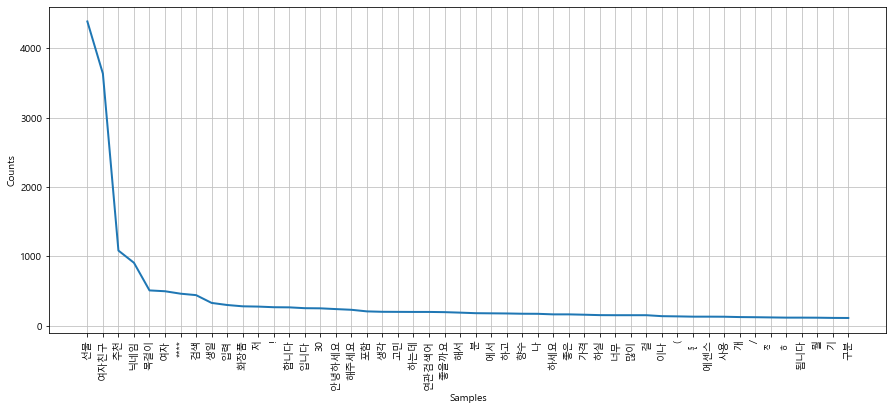

In [11]:
plt.figure(figsize=(15,6))
ko.plot(50)

In [12]:
# !pip install wordcloud

(-0.5, 399.5, 199.5, -0.5)

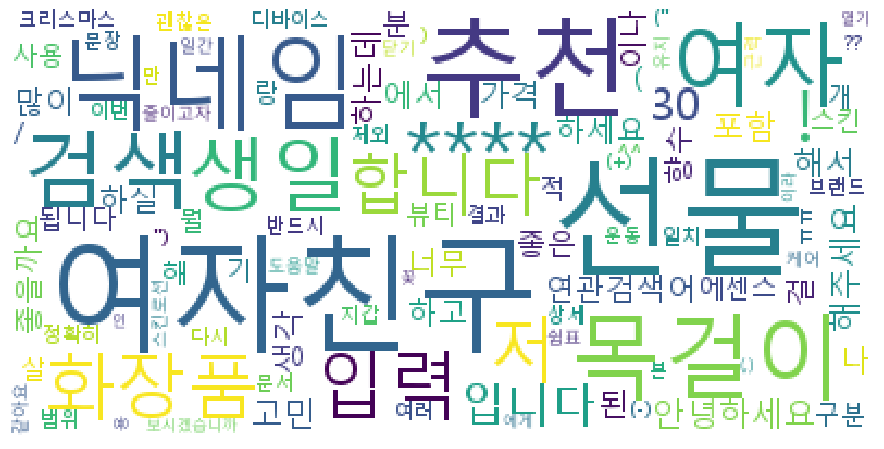

In [18]:
""" 워드 크라우드 그리기 """
#!pip install wordcloud
from wordcloud import WordCloud, STOPWORDS
from PIL import Image

data = ko.vocab().most_common(100)
wordcloud = WordCloud(font_path='c:/Windows/Fonts/malgun.ttf', relative_scaling=0.2, 
                      background_color='white').generate_from_frequencies(dict(data))
plt.figure(figsize=(16,8))
plt.imshow(wordcloud)
plt.axis('off')

(-0.5, 766.5, 719.5, -0.5)

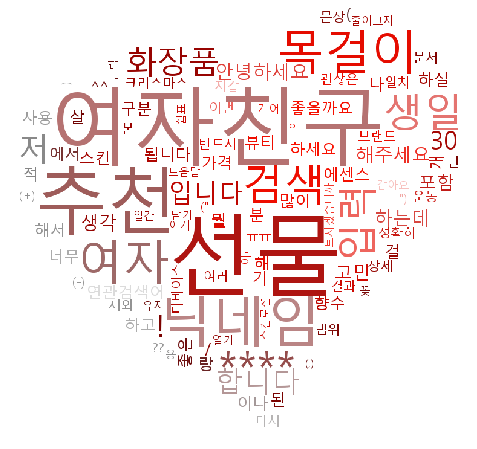

In [27]:
""" 이미지로 마스킹하여 워드 크라우드 그리기 """
from wordcloud import ImageColorGenerator
mask = np.array(Image.open('./img/heart_image.jpg'))
image_colors =  ImageColorGenerator(mask)


data = ko.vocab().most_common(100)
wordcloud = WordCloud(font_path='c:/Windows/Fonts/malgun.ttf', relative_scaling=0.2, 
                      mask=mask,
                      background_color='white').generate_from_frequencies(dict(data))
plt.figure(figsize=(16,8))
plt.imshow(wordcloud.recolor(color_func=image_colors))
plt.axis('off')